In [1]:
# importing key libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt

import sklearn
import statsmodels

In [2]:
df = pd.read_csv('listings_summary.csv')

In [3]:
pd.options.display.max_columns = 3000
pd.options.display.max_rows = 3000

In [4]:
df

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [5]:
df.shape

(22552, 76)

In [6]:
df.describe(include='all').T # used to check and generate the descriptive statistics of the DataFrame.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,22552.0,NaN,NaN,NaN,15715604.765874,8552068.641251,2015.0,8065953.5,16866381.0,22583930.75,29867352.0
scrape_id,22552.0,NaN,NaN,NaN,20181100000000.0,0.0,20181100000000.0,20181100000000.0,20181100000000.0,20181100000000.0,20181100000000.0
last_scraped,22552.0,NaN,NaN,NaN,43411.000266,0.023066,43411.0,43411.0,43411.0,43411.0,43413.0
experiences_offered,22552,1,none,22552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,22552.0,NaN,NaN,NaN,54033548.019643,58162902.676173,2217.0,9240002.25,31267110.0,80675177.0,224508134.0
host_name,22526,5997,Anna,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_since,22526,2914,20-02-2017,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_location,22436,1036,"Berlin, Berlin, Germany",17188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,9658,4,within an hour,5081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,9657.0,NaN,NaN,NaN,0.918985,0.193761,0.0,0.95,1.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [8]:
missing_values = df.isnull().sum() # Count the missing values in each column
total_rows = df.shape[0] # Total number of rows
missing_percentage = (missing_values / total_rows) * 100 # Calculate the percentage of missing values for each column
columns_with_missing_values = missing_percentage[missing_percentage > 30].index # Select columns with more than 30% missing values
print(columns_with_missing_values)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'jurisdiction_names'],
      dtype='object')


In [9]:
df.drop(columns=columns_with_missing_values, inplace=True) # Drop the columns with more than 30% missing values from the DataFrame

In [10]:
df.isnull().sum()

id                                     0
scrape_id                              0
last_scraped                           0
experiences_offered                    0
host_id                                0
host_name                             26
host_since                            26
host_location                        116
host_is_superhost                     26
host_neighbourhood                  5094
host_listings_count                   26
host_total_listings_count             26
host_verifications                     0
host_has_profile_pic                  26
host_identity_verified                26
street                                 0
neighbourhood                       1131
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   5
state                                 84
zipcode                              656
market                                63
smart_location                         0
country_code    

In [11]:
df.drop(['id','scrape_id'],axis=1,inplace=True) # to drop the id and scrape_id columns

In [12]:
columns_to_drop = ['last_scraped',
                  'experiences_offered', 'host_id', 'host_name', 'host_location', 'street', 'neighbourhood', 'city',
                   'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_updated',
                   'calendar_last_scraped', 'host_verifications', 'requires_license', 'instant_bookable',
                   'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification']

df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,18-08-2008,t,Mitte,4.0,4.0,t,t,Brunnenstr. Süd,Mitte,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,1,$28.00,4,1125,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,strict_14_with_grace_period,4,3.76
1,16-09-2008,f,Prenzlauer Berg,1.0,1.0,t,t,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,1,$0.00,2,40,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1,1.42
2,19-10-2008,f,Prenzlauer Berg,1.0,1.0,t,t,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,2,$20.00,62,1125,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,strict_14_with_grace_period,1,1.25
3,07-11-2008,f,Schöneberg,1.0,1.0,t,t,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,1,$18.00,5,360,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,strict_14_with_grace_period,1,0.39
4,16-05-2009,t,Prenzlauer Berg,1.0,1.0,t,t,Helmholtzplatz,Pankow,52.543157,13.415091,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00,1,$24.00,2,10,197,40043.0,43408.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,moderate,1,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,02-08-2016,f,Mitte,1.0,1.0,t,f,Brunnenstr. Süd,Mitte,52.533865,13.400731,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Smoking allowed"",Heating,Essentials,Sha...",$60.00,1,$0.00,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
22548,17-04-2016,f,Prenzlauer Berg,6.0,6.0,t,f,Schöneberg-Nord,Tempelhof - Schöneberg,52.496211,13.341738,t,Apartment,Shared room,6,1.0,1.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",$20.00,1,$10.00,1,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,6,NaN
22549,03-08-2012,f,Prenzlauer Berg,3.0,3.0,t,t,Prenzlauer Berg Südwest,Pankow,52.531800,13.411999,f,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,Washer,""Fire extinguishe...",$85.00,1,$0.00,3,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,2,NaN
22550,28-06-2015,f,Mitte,3.0,3.0,t,f,Alexanderplatz,Mitte,52.520802,13.378688,t,Boutique hotel,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Paid parking off premises"",Doorman,Elev...",$99.00,1,$0.00,1,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,3,NaN


In [14]:
df.select_dtypes(include='object').info() # to fetch the details of all the categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   host_since                    22526 non-null  object
 1   host_is_superhost             22526 non-null  object
 2   host_neighbourhood            17458 non-null  object
 3   host_has_profile_pic          22526 non-null  object
 4   host_identity_verified        22526 non-null  object
 5   neighbourhood_cleansed        22552 non-null  object
 6   neighbourhood_group_cleansed  22552 non-null  object
 7   is_location_exact             22552 non-null  object
 8   property_type                 22552 non-null  object
 9   room_type                     22552 non-null  object
 10  bed_type                      22552 non-null  object
 11  amenities                     22552 non-null  object
 12  price                         22552 non-null  object
 13  extra_people    

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# Identify categorical columns

categorical_columns = ['host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'cancellation_policy']

In [17]:
# Convert categorical columns to numerical using LabelEncoder

le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [18]:
df["price"] = df["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
df["price"] = df["price"].apply(lambda x: x.replace(",", "")) # Remove thousand separator
df["price"] = df["price"].astype("float") # Cast the column into type float
df.describe()["price"]

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [19]:
# Convert the price column to string
df['price'] = df['price'].astype(str)

# Remove dollar sign
df['price'] = df['price'].apply(lambda x: x.replace("$", ""))

# Remove thousand separator
df['price'] = df['price'].apply(lambda x: x.replace(",", ""))

# Cast the column into type float
df['price'] = df['price'].apply(lambda x: float(x) if isinstance(x, str) else x)

# Print the updated DataFrame
print(df)

       host_since  host_is_superhost  host_neighbourhood  host_listings_count  \
0      18-08-2008                  1                 105                  4.0   
1      16-09-2008                  0                 131                  1.0   
2      19-10-2008                  0                 131                  1.0   
3      07-11-2008                  0                 146                  1.0   
4      16-05-2009                  1                 131                  1.0   
...           ...                ...                 ...                  ...   
22547  02-08-2016                  0                 105                  1.0   
22548  17-04-2016                  0                 131                  6.0   
22549  03-08-2012                  0                 131                  3.0   
22550  28-06-2015                  0                 105                  3.0   
22551  09-03-2018                  0                 116                  1.0   

       host_total_listings_

In [20]:
df["extra_people"] = df["extra_people"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
df["extra_people"] = df["extra_people"].apply(lambda x: x.replace(",", "")) # Remove thousand separator
df["extra_people"] = df["extra_people"].astype("float") # Cast the column into type float
df.describe()["extra_people"]

count    22552.000000
mean         8.257716
std         11.151069
min          0.000000
25%          0.000000
50%          5.000000
75%         15.000000
max        250.000000
Name: extra_people, dtype: float64

In [21]:
# Convert the date strings to datetime objects
df['host_since'] = pd.to_datetime(df['host_since'], format='%d-%m-%Y')

# Convert the datetime objects to Unix timestamps (int64)
df['host_since'] = df['host_since'].astype('int64') // 10**9

# Print the updated DataFrame
print(df)

       host_since  host_is_superhost  host_neighbourhood  host_listings_count  \
0      1219017600                  1                 105                  4.0   
1      1221523200                  0                 131                  1.0   
2      1224374400                  0                 131                  1.0   
3      1226016000                  0                 146                  1.0   
4      1242432000                  1                 131                  1.0   
...           ...                ...                 ...                  ...   
22547  1470096000                  0                 105                  1.0   
22548  1460851200                  0                 131                  6.0   
22549  1343952000                  0                 131                  3.0   
22550  1435449600                  0                 105                  3.0   
22551  1520553600                  0                 116                  1.0   

       host_total_listings_

In [22]:
# Get the columns with 'int32' data type
int32_columns = df.select_dtypes(include='int32').columns

# Change data type of int32 columns to int64
df[int32_columns] = df[int32_columns].astype('int64')

# Print the updated DataFrame
print(df)

       host_since  host_is_superhost  host_neighbourhood  host_listings_count  \
0      1219017600                  1                 105                  4.0   
1      1221523200                  0                 131                  1.0   
2      1224374400                  0                 131                  1.0   
3      1226016000                  0                 146                  1.0   
4      1242432000                  1                 131                  1.0   
...           ...                ...                 ...                  ...   
22547  1470096000                  0                 105                  1.0   
22548  1460851200                  0                 131                  6.0   
22549  1343952000                  0                 131                  3.0   
22550  1435449600                  0                 105                  3.0   
22551  1520553600                  0                 116                  1.0   

       host_total_listings_

In [23]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_since                      22552 non-null  int64  
 1   host_is_superhost               22552 non-null  int64  
 2   host_neighbourhood              22552 non-null  int64  
 3   host_listings_count             22526 non-null  float64
 4   host_total_listings_count       22526 non-null  float64
 5   host_has_profile_pic            22552 non-null  int64  
 6   host_identity_verified          22552 non-null  int64  
 7   neighbourhood_cleansed          22552 non-null  int64  
 8   neighbourhood_group_cleansed    22552 non-null  int64  
 9   latitude                        22552 non-null  float64
 10  longitude                       22552 non-null  float64
 11  is_location_exact               22552 non-null  int64  
 12  property_type                   

In [24]:
# Calculate the median values for each column
median_values = df.median()

# Iterate over the columns
for column in df.columns:
    # Check if the column has missing values
    if df[column].isnull().any():
        # Fill missing values with the respective column median
        df[column].fillna(median_values[column], inplace=True)

# Print the DataFrame with filled missing values
print(df)

       host_since  host_is_superhost  host_neighbourhood  host_listings_count  \
0      1219017600                  1                 105                  4.0   
1      1221523200                  0                 131                  1.0   
2      1224374400                  0                 131                  1.0   
3      1226016000                  0                 146                  1.0   
4      1242432000                  1                 131                  1.0   
...           ...                ...                 ...                  ...   
22547  1470096000                  0                 105                  1.0   
22548  1460851200                  0                 131                  6.0   
22549  1343952000                  0                 131                  3.0   
22550  1435449600                  0                 105                  3.0   
22551  1520553600                  0                 116                  1.0   

       host_total_listings_

In [25]:
df.isnull().sum()

host_since                        0
host_is_superhost                 0
host_neighbourhood                0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
first_review                      0
last_review                 

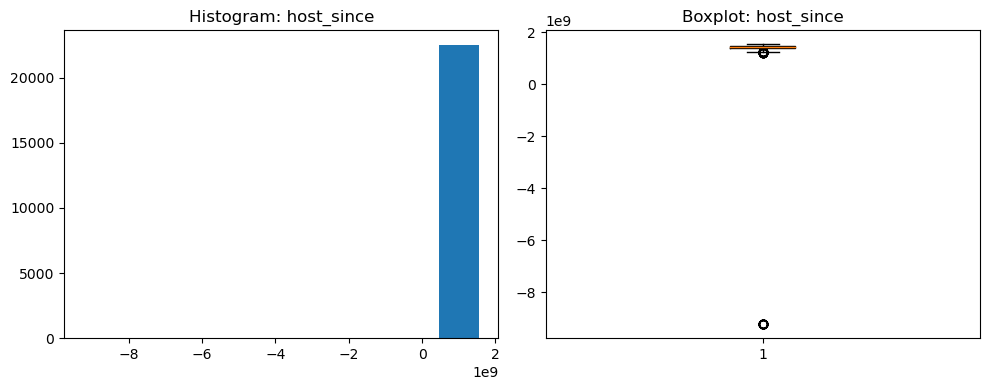

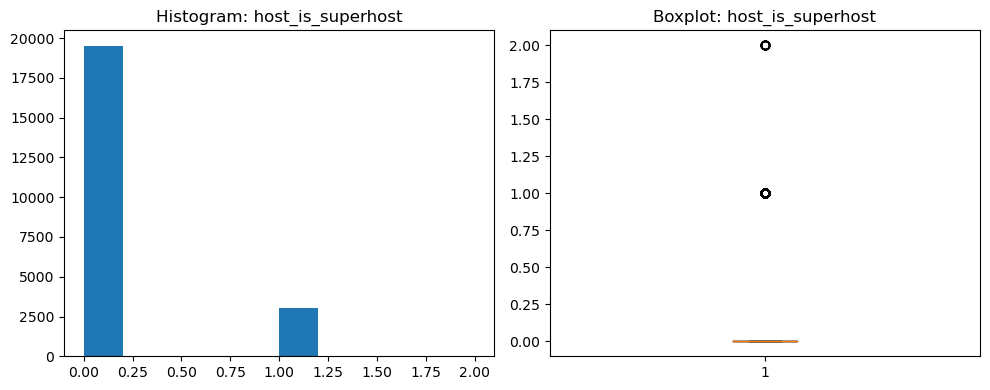

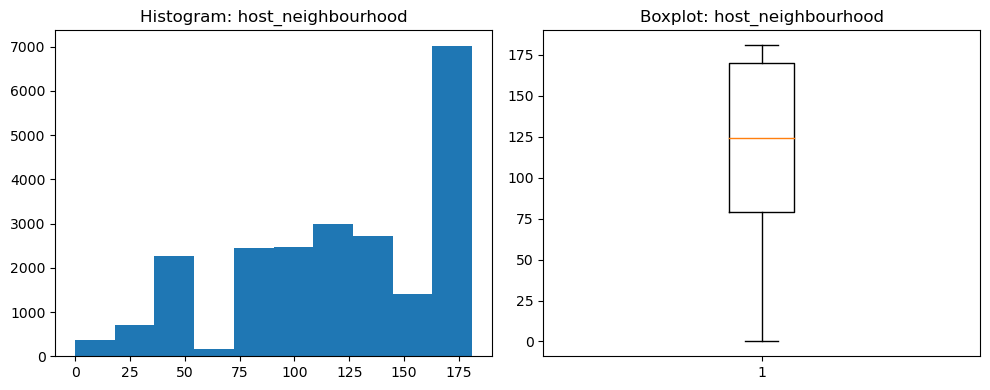

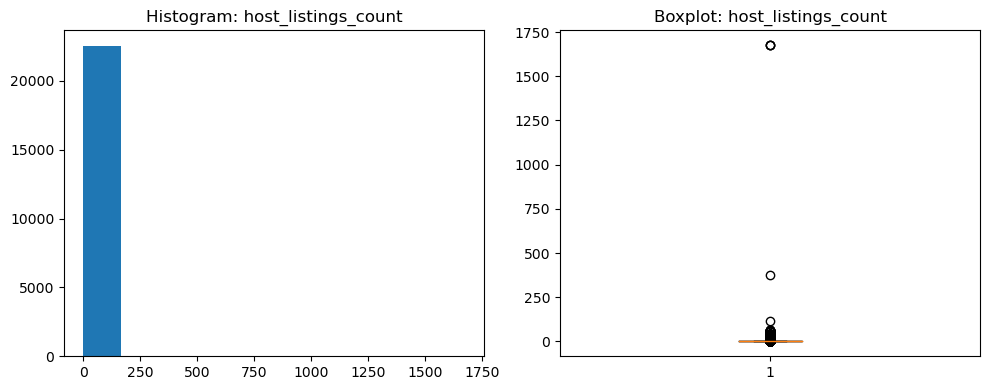

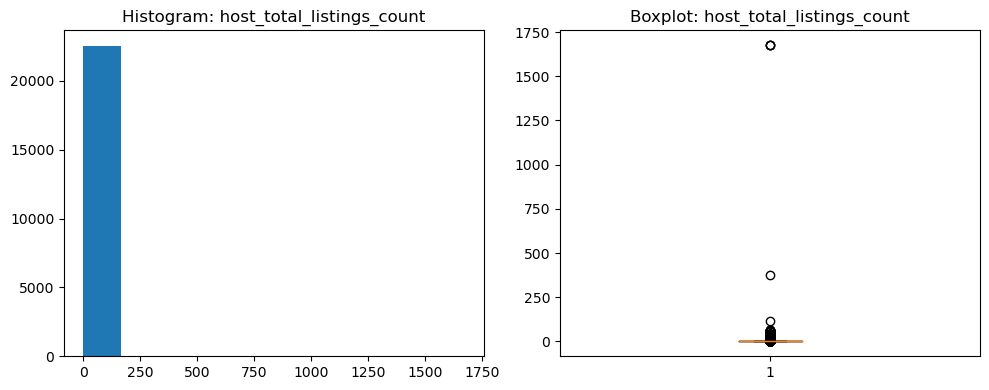

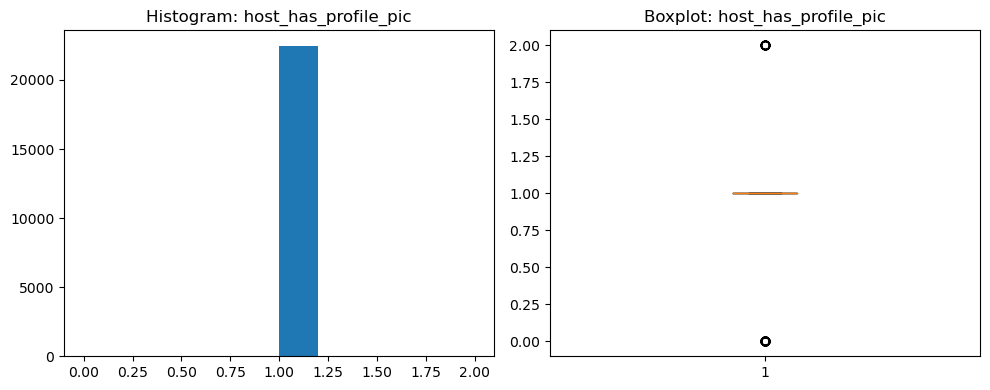

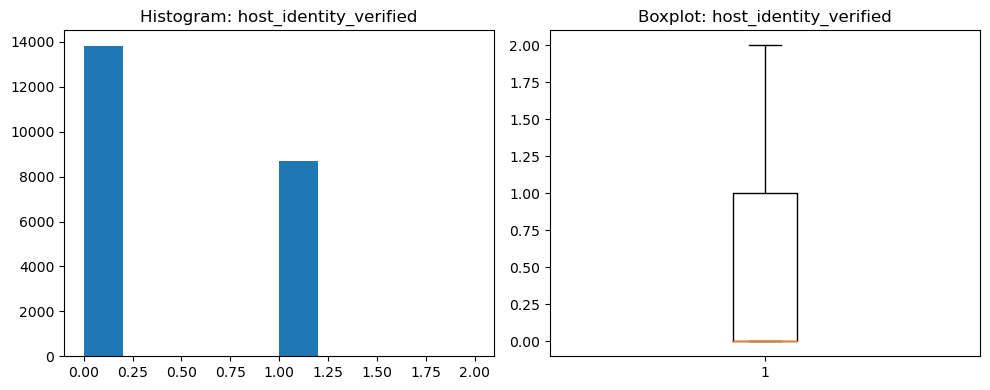

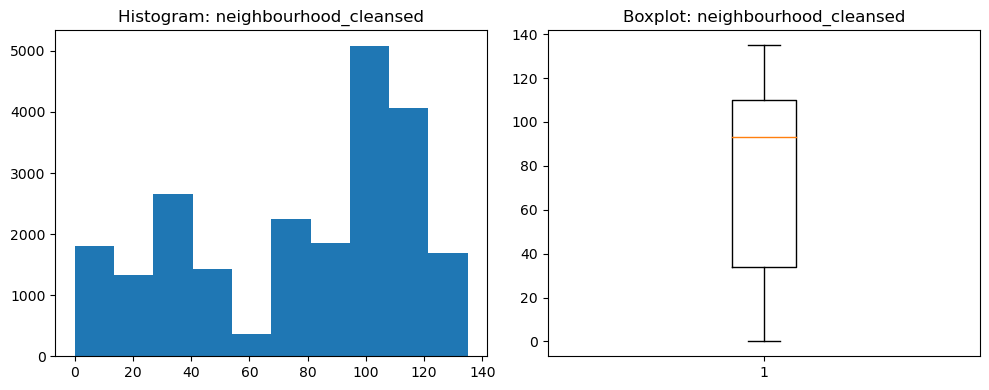

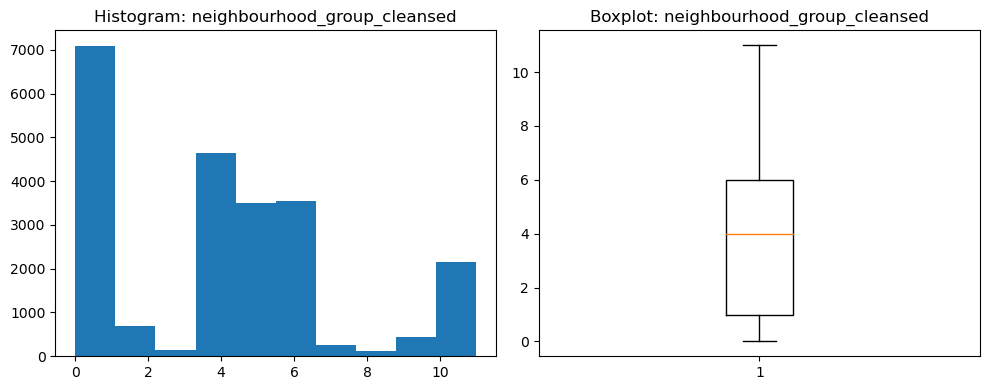

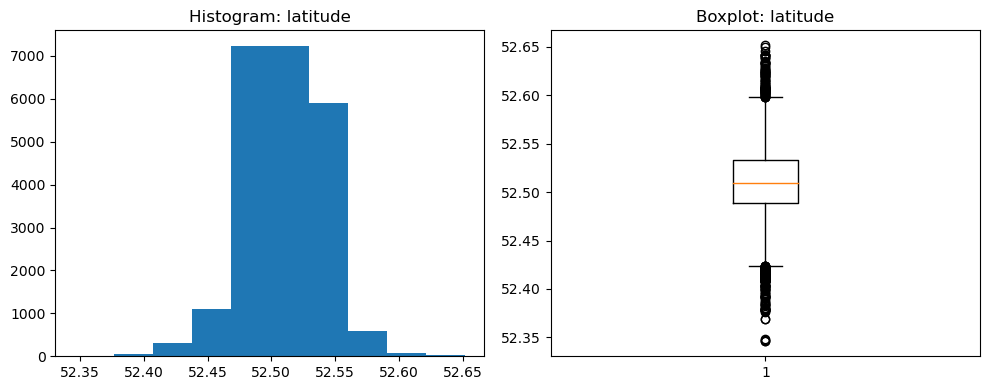

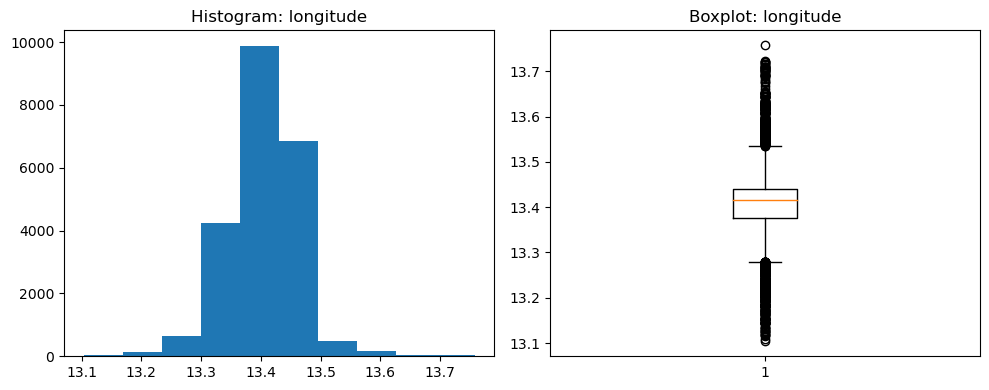

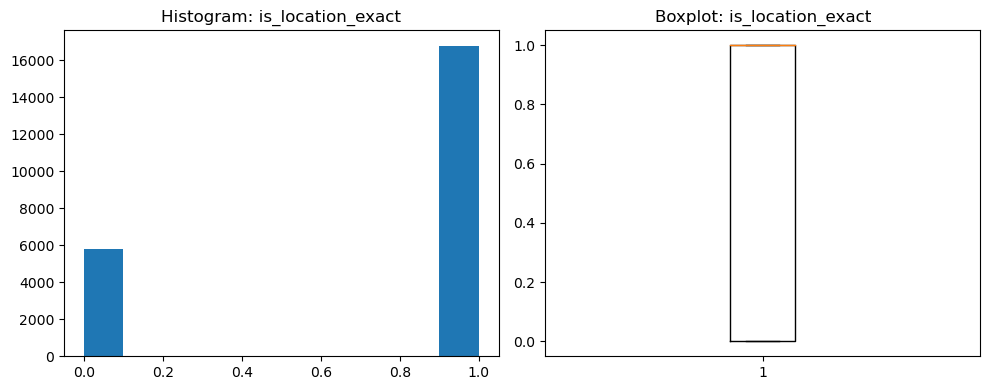

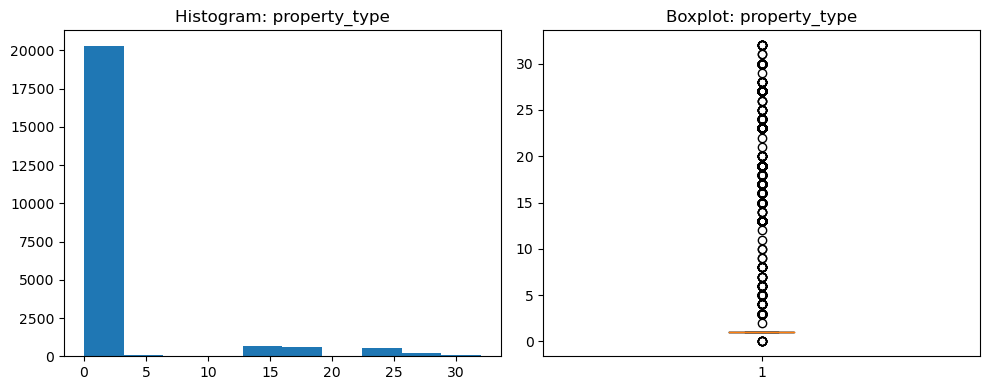

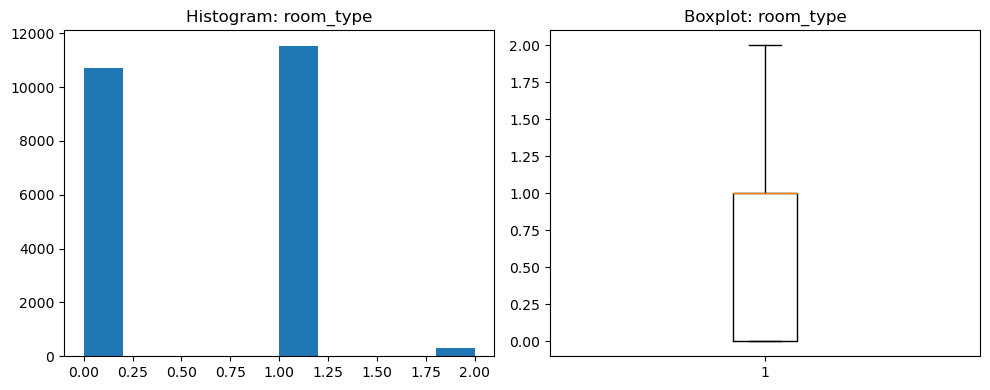

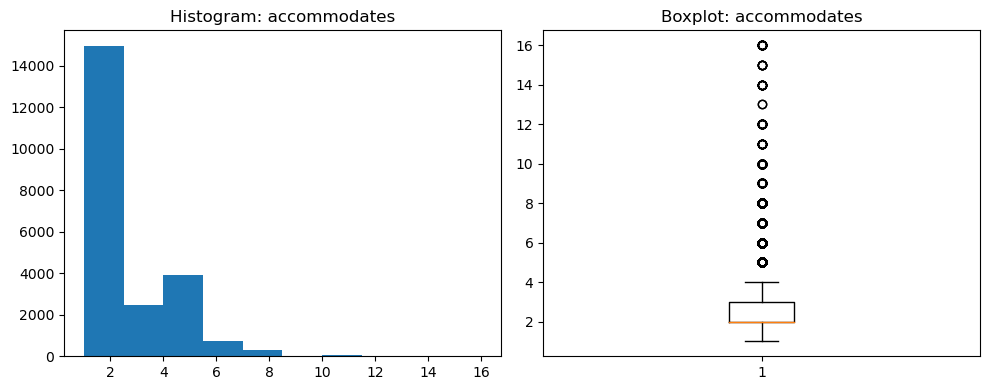

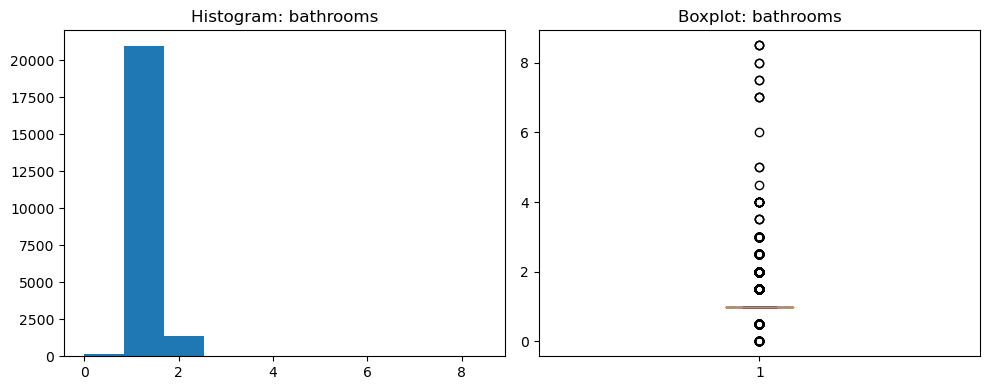

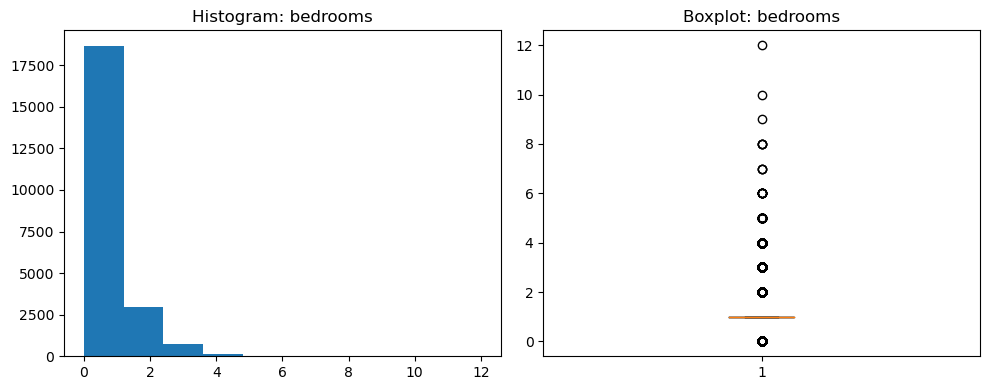

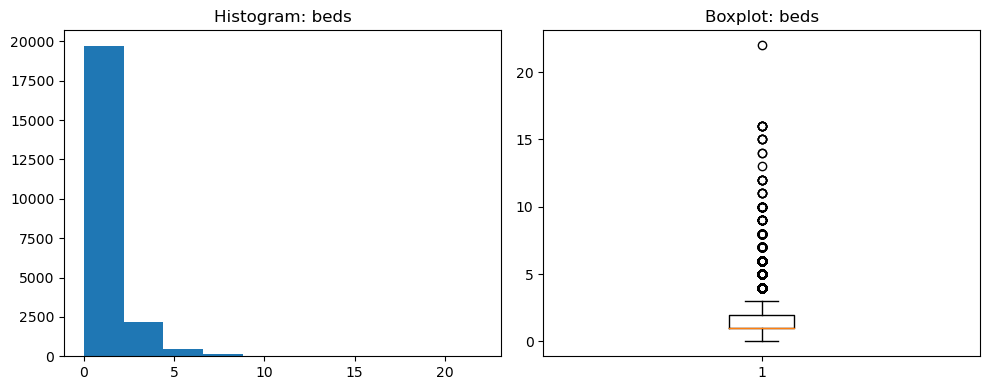

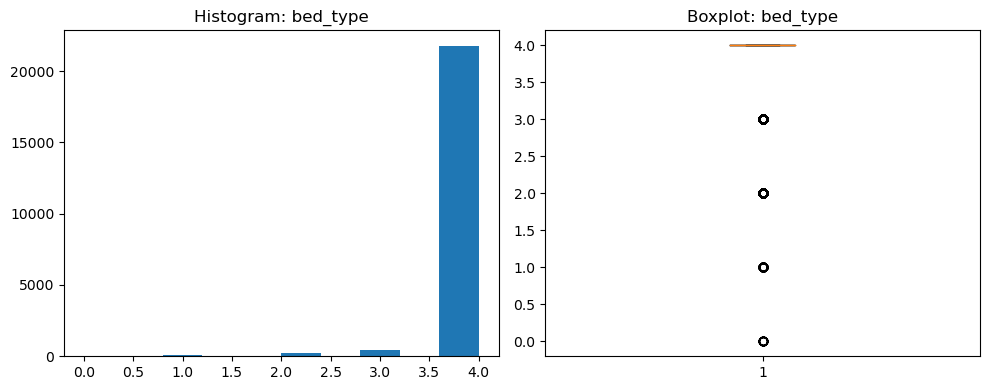

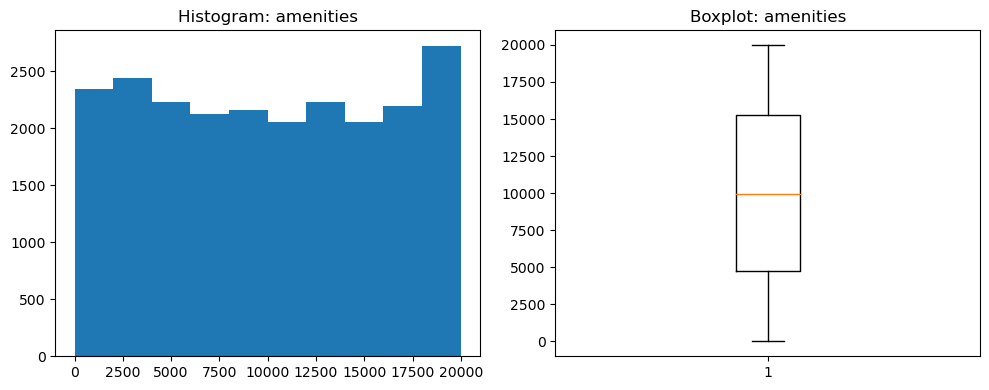

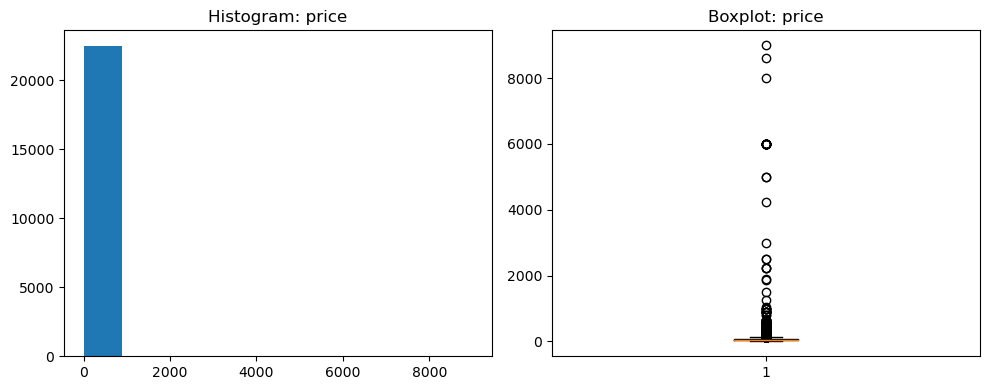

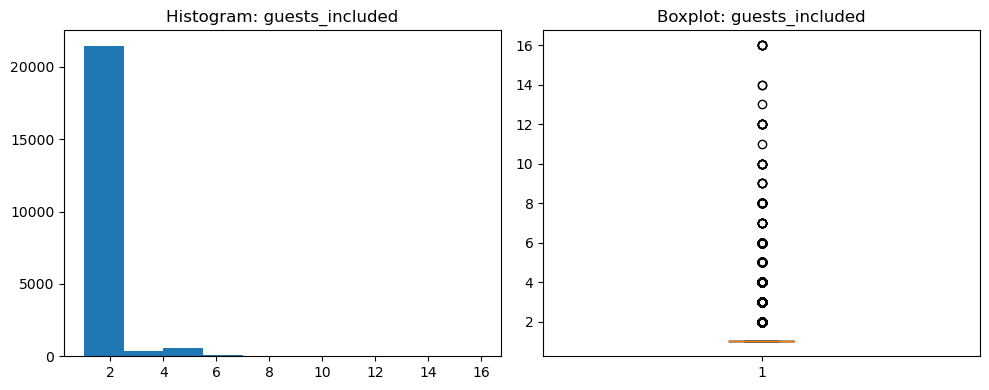

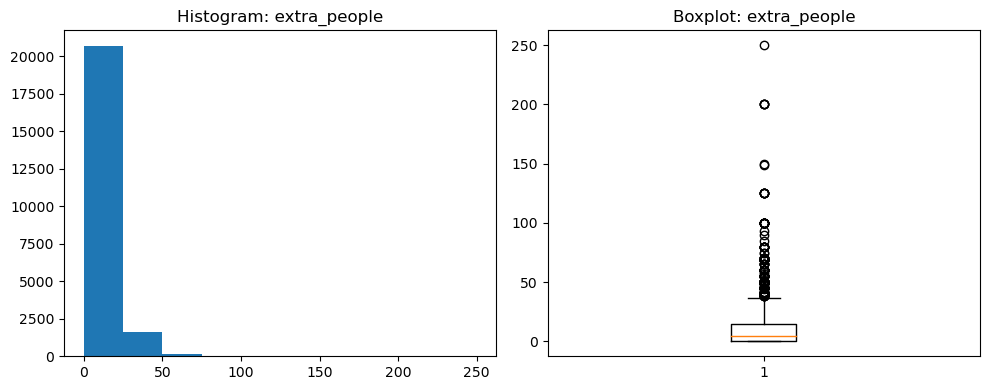

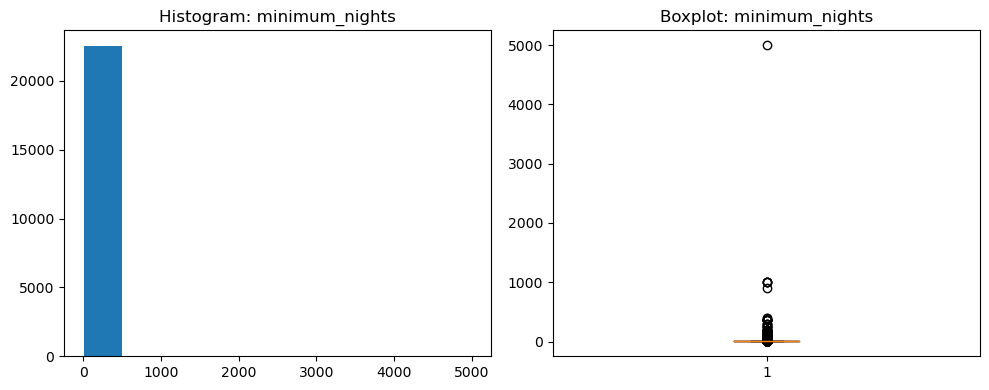

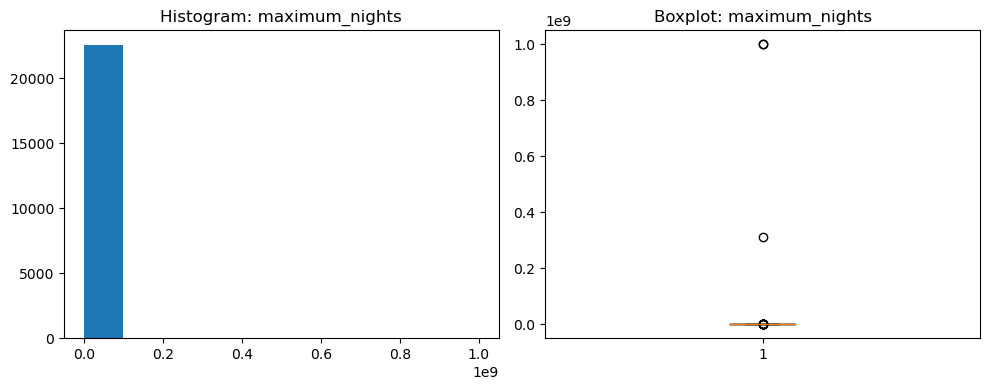

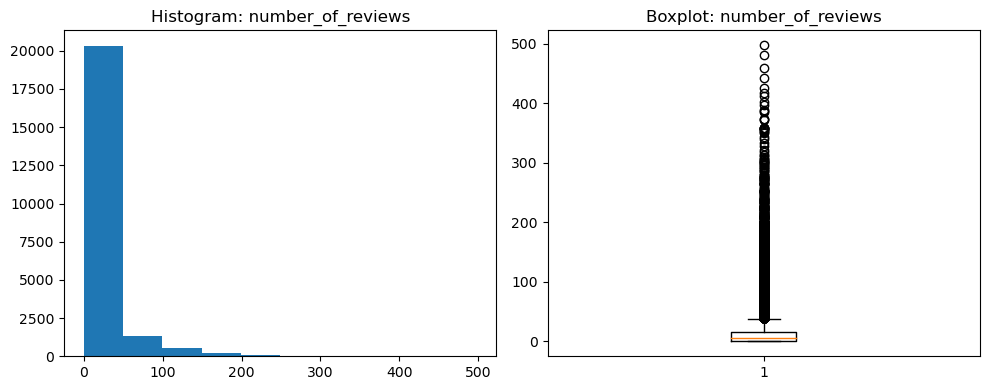

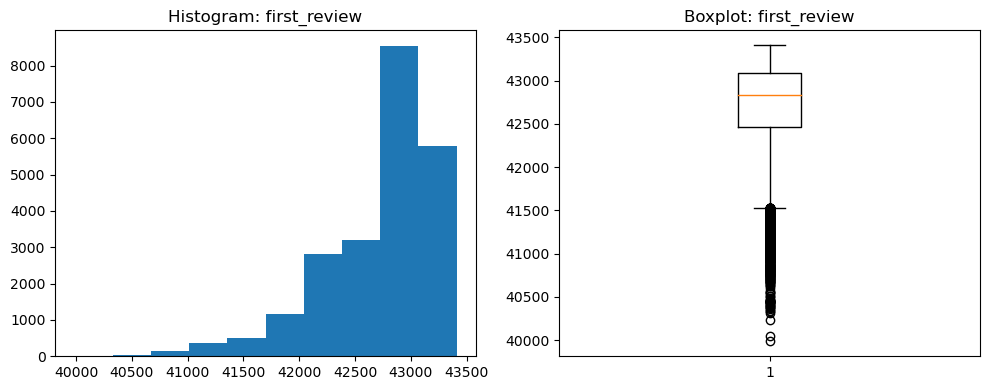

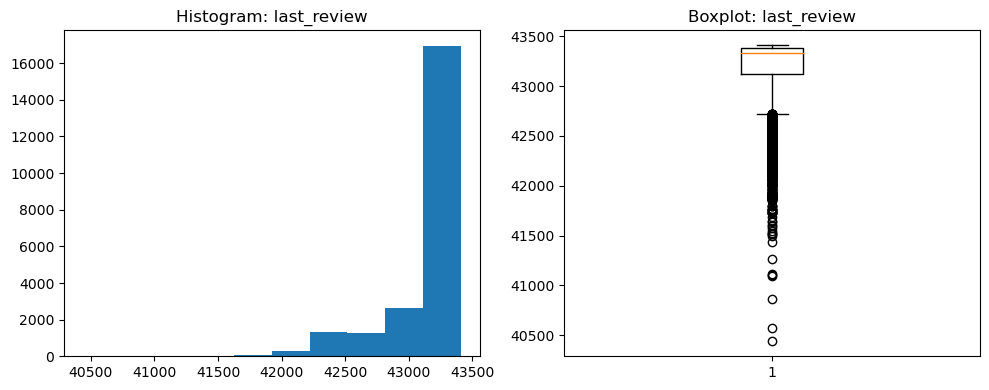

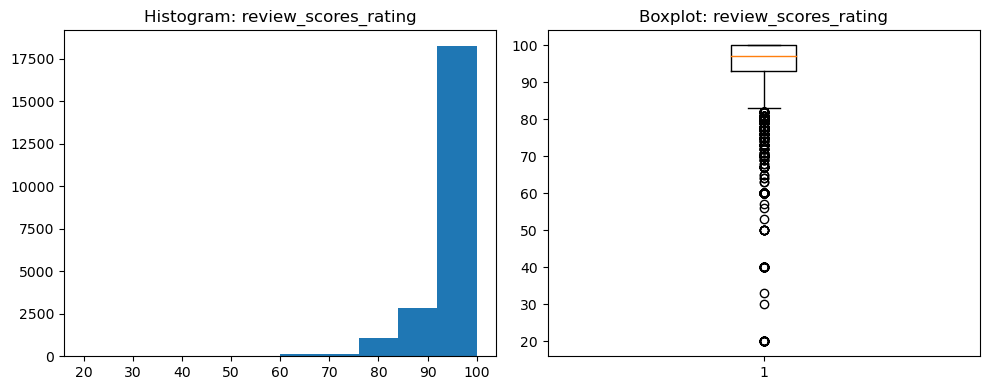

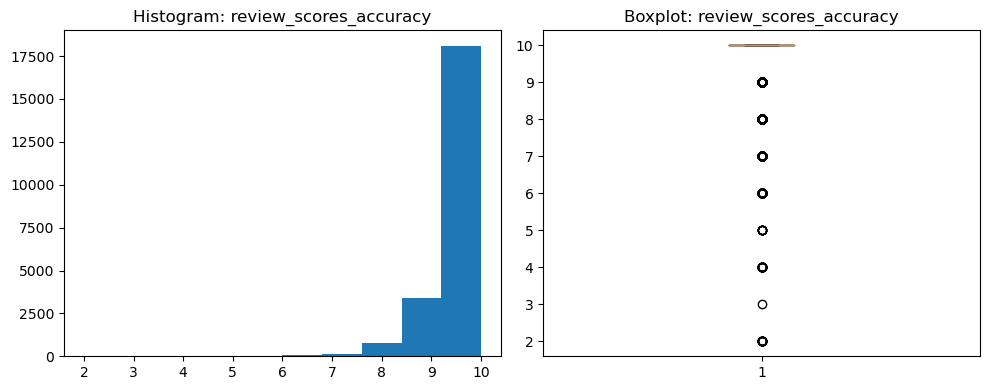

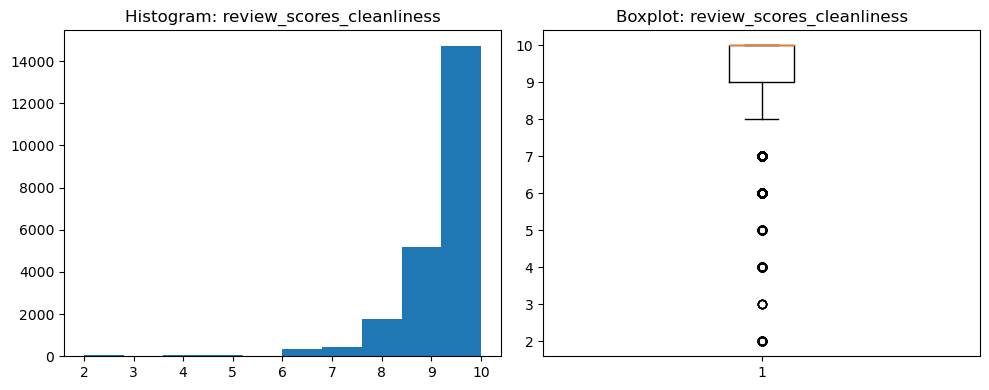

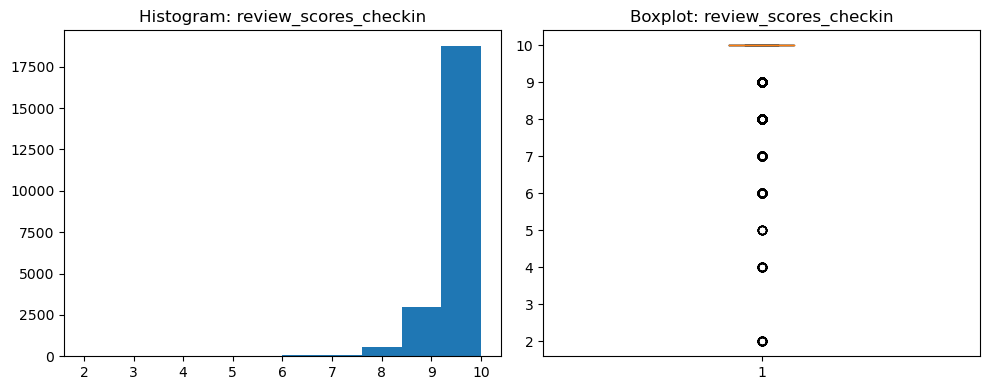

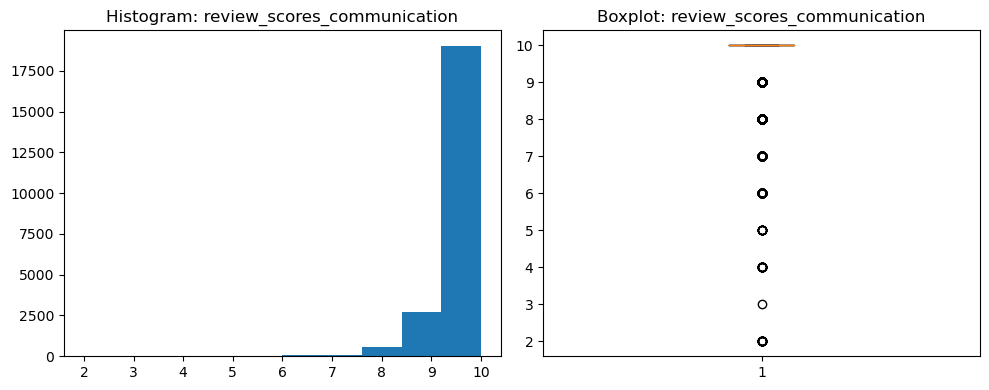

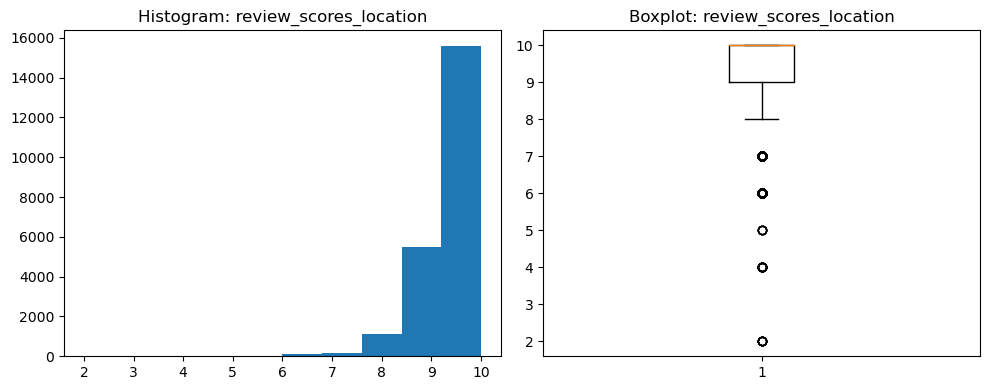

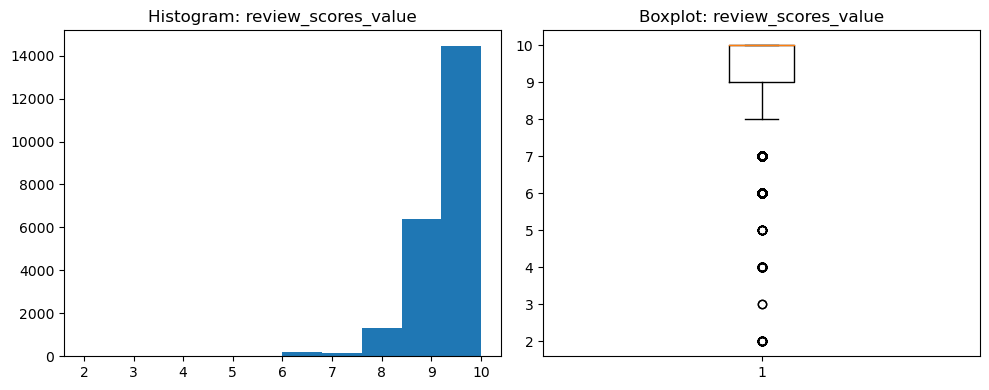

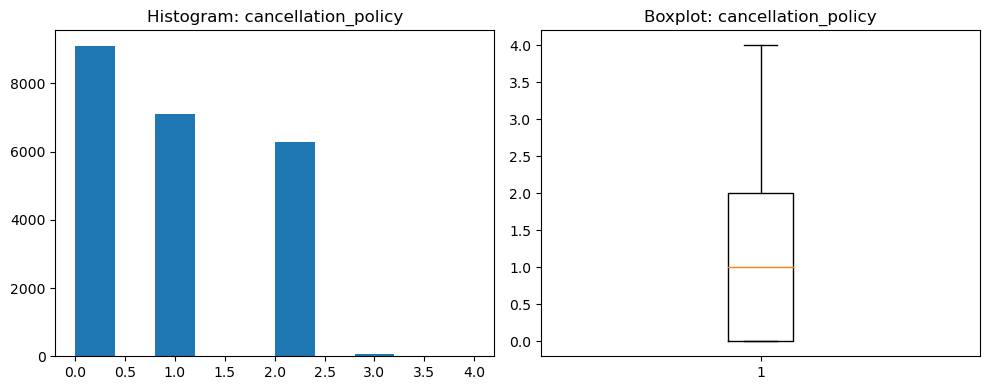

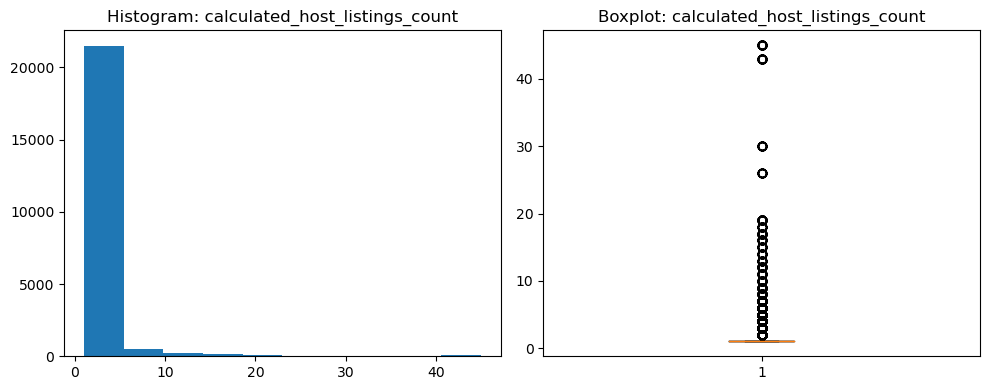

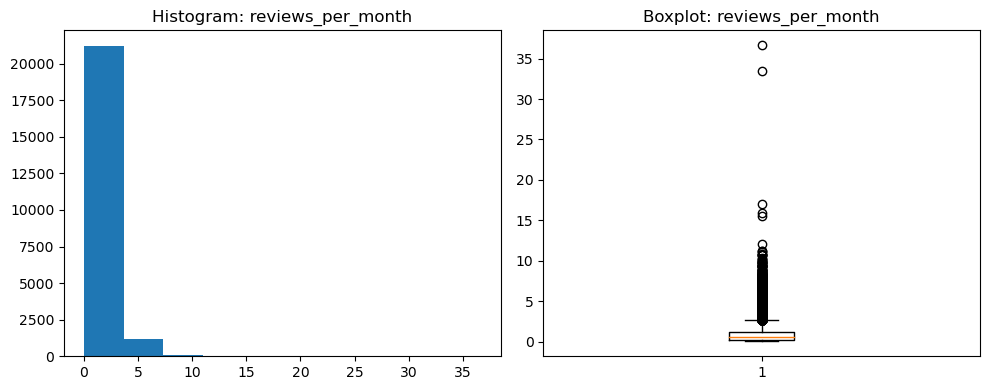

In [26]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Create a figure with two subplots (histogram and boxplot) side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the histogram in the first subplot
    axes[0].hist(df[column], bins=10)
    axes[0].set_title('Histogram: ' + column)
    
    # Plot the boxplot in the second subplot
    axes[1].boxplot(df[column])
    axes[1].set_title('Boxplot: ' + column)
    
    # Adjust the layout of subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

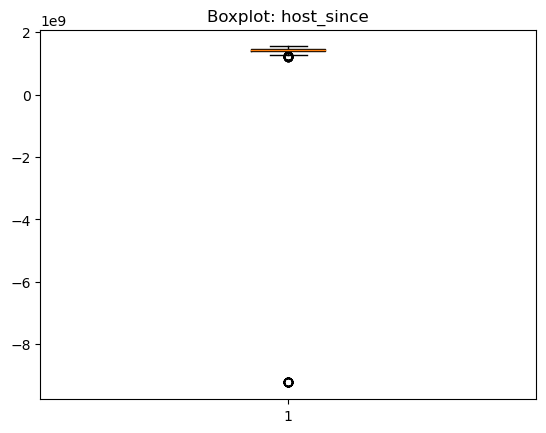

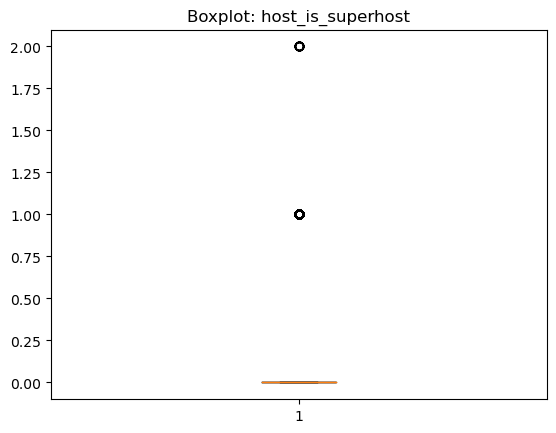

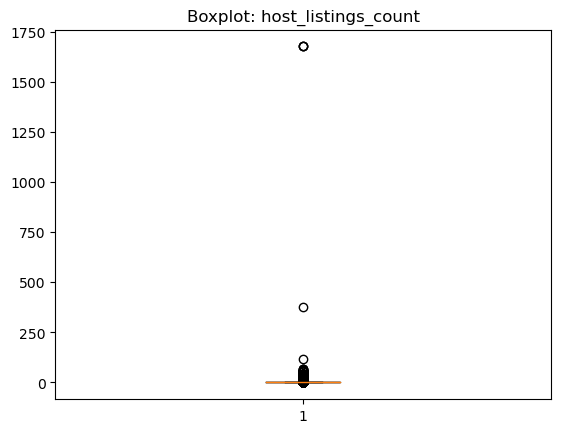

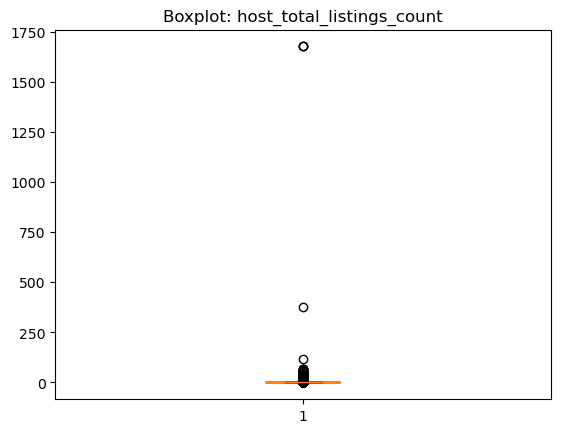

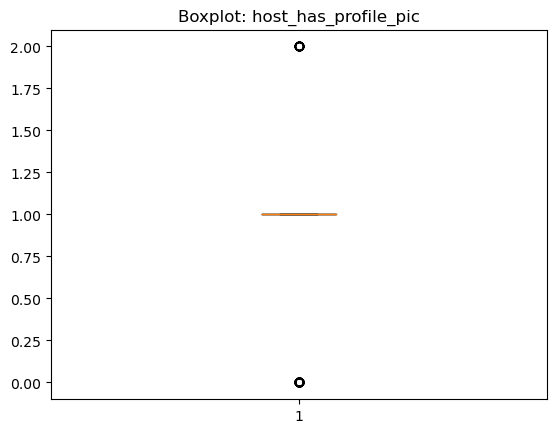

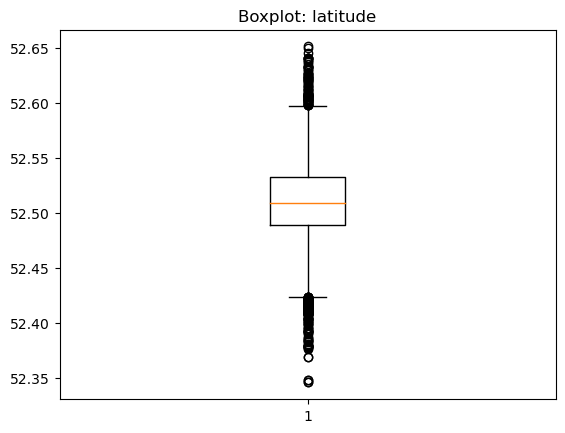

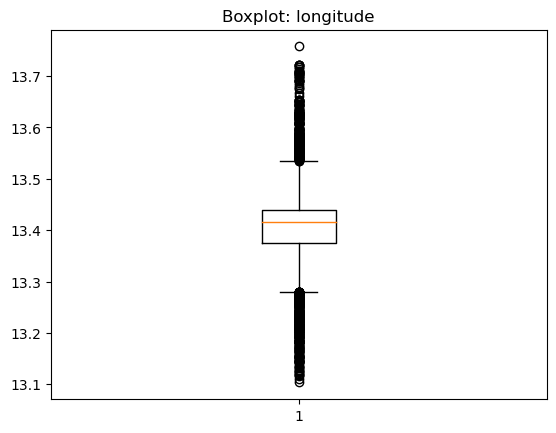

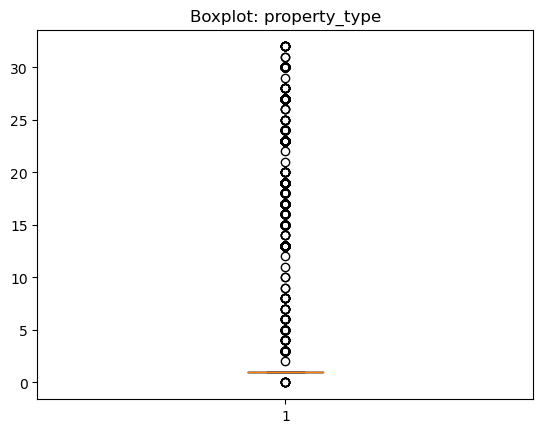

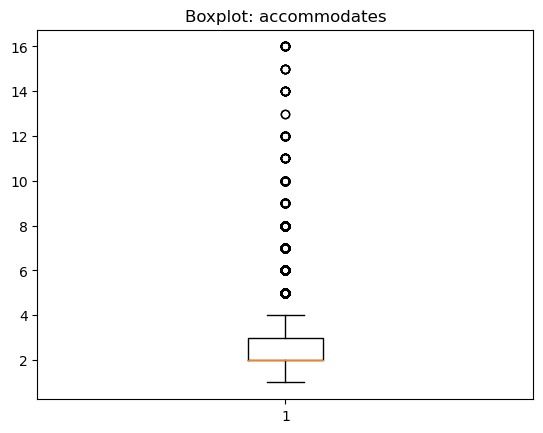

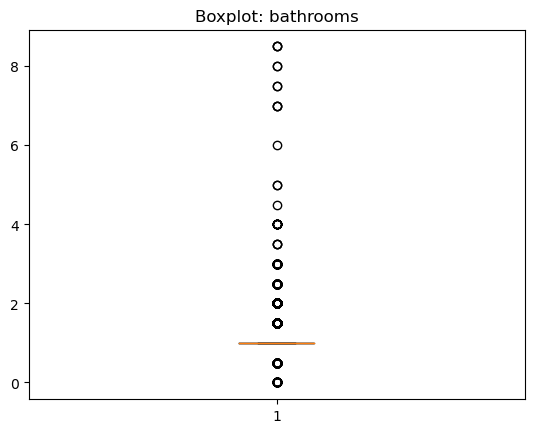

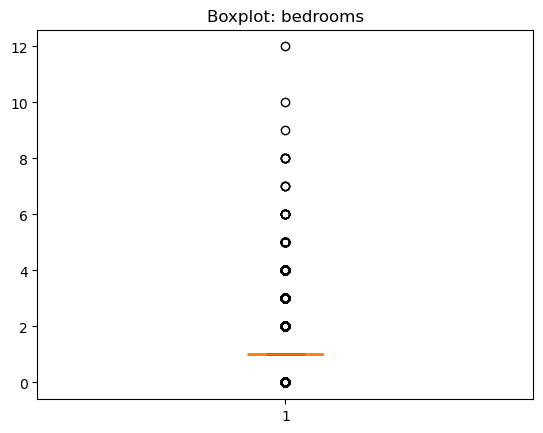

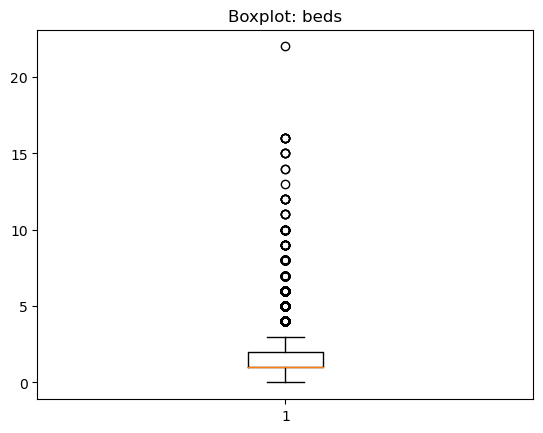

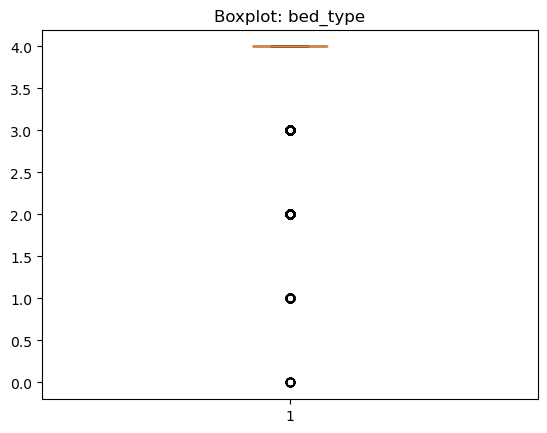

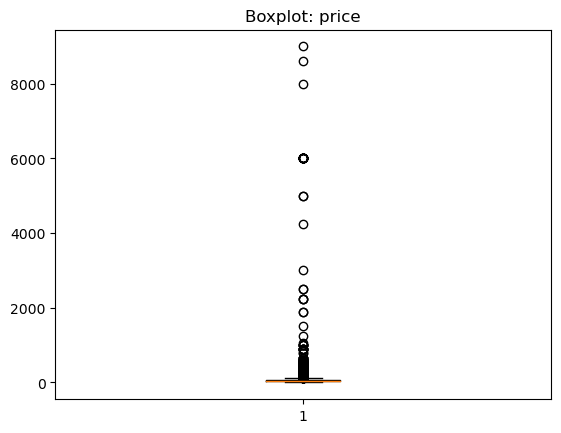

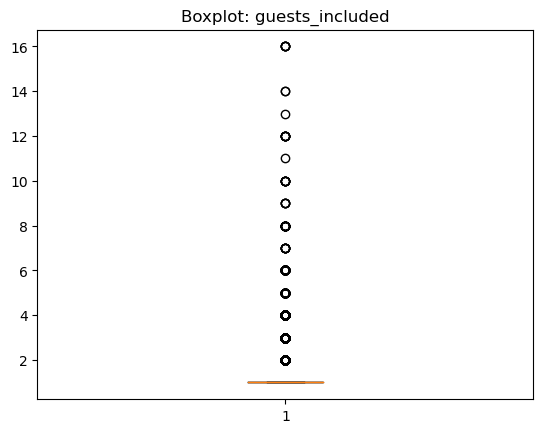

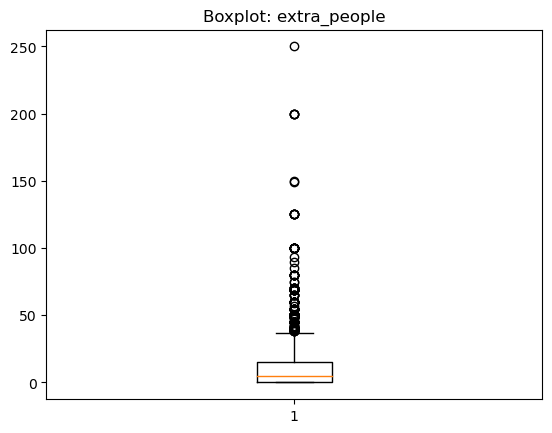

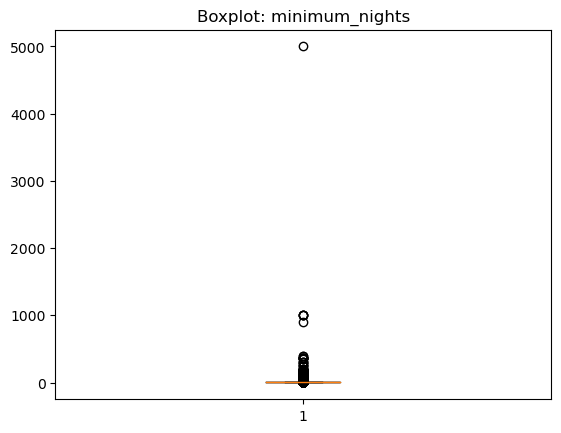

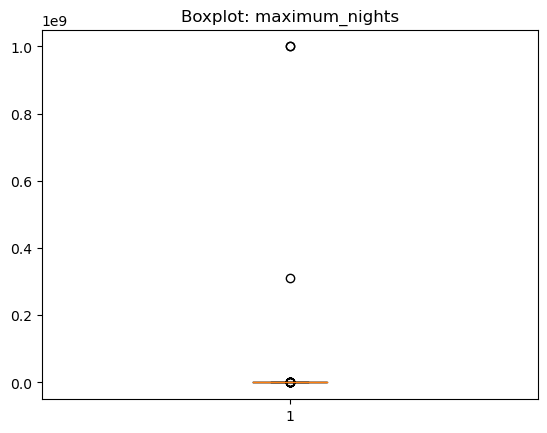

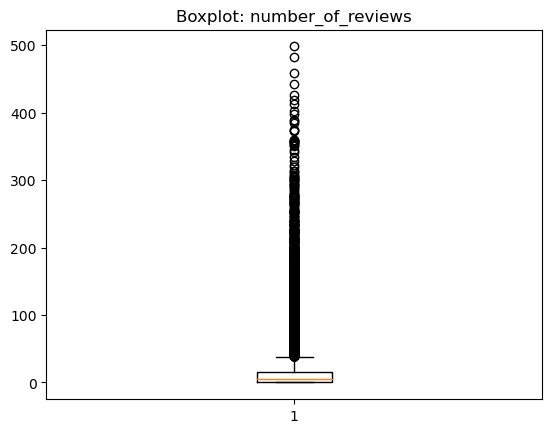

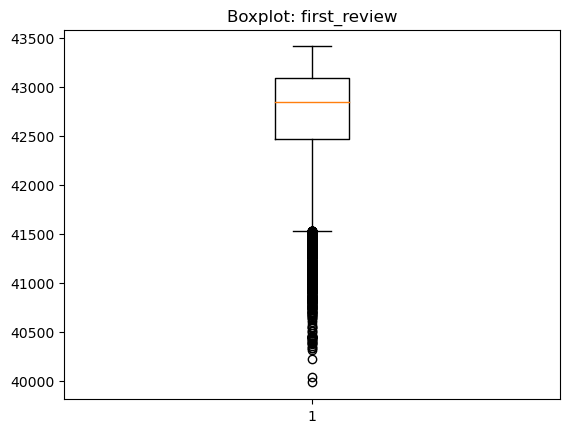

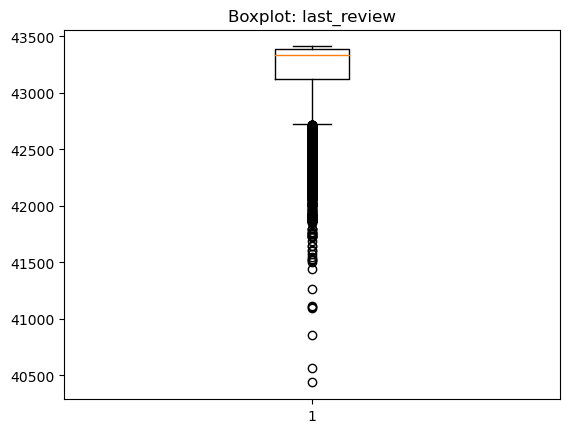

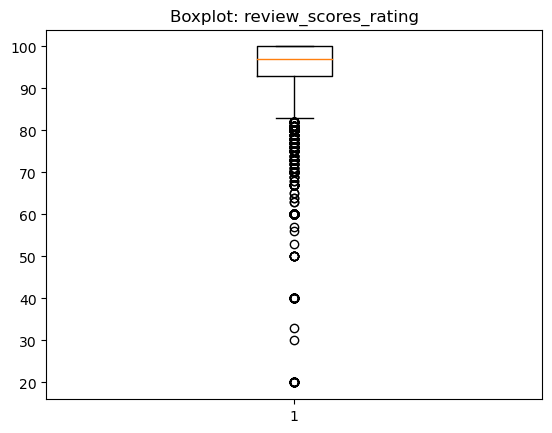

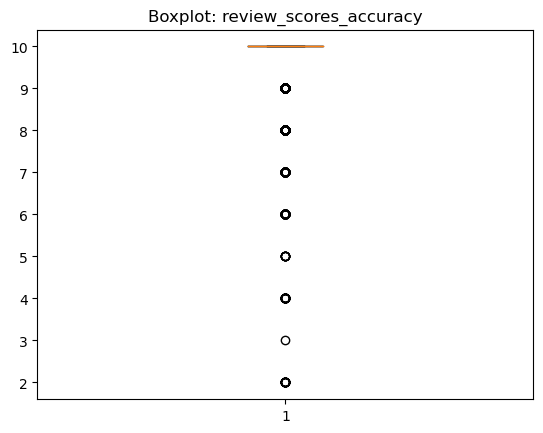

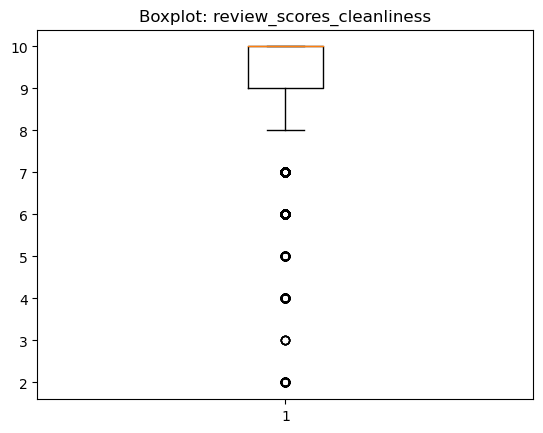

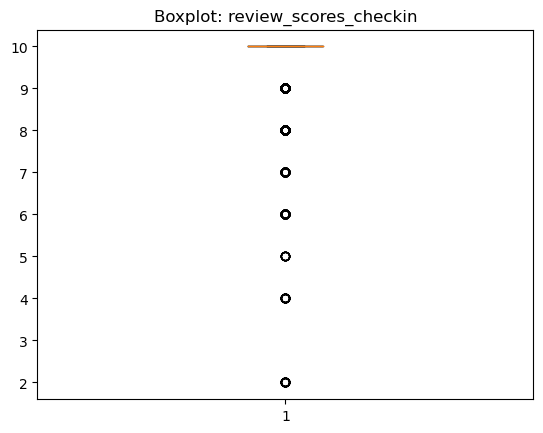

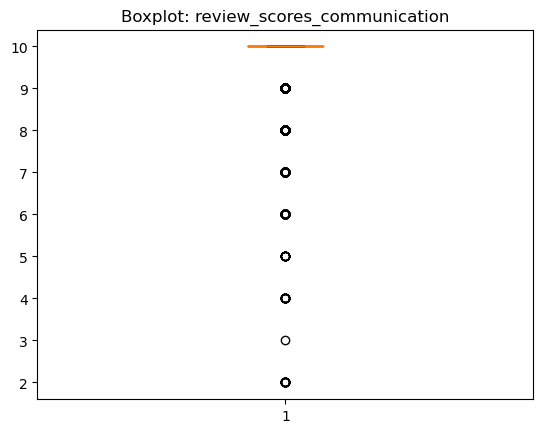

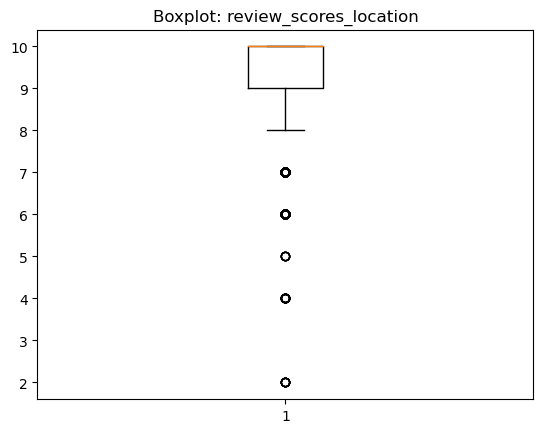

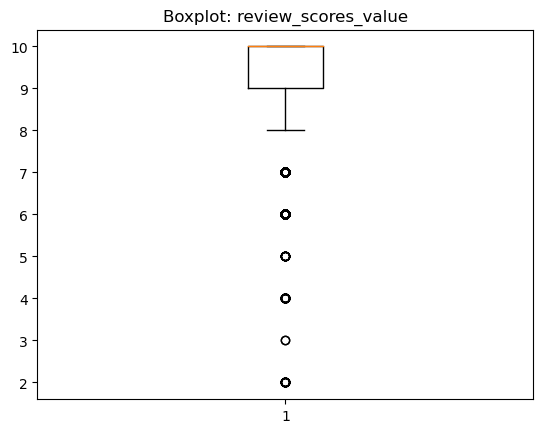

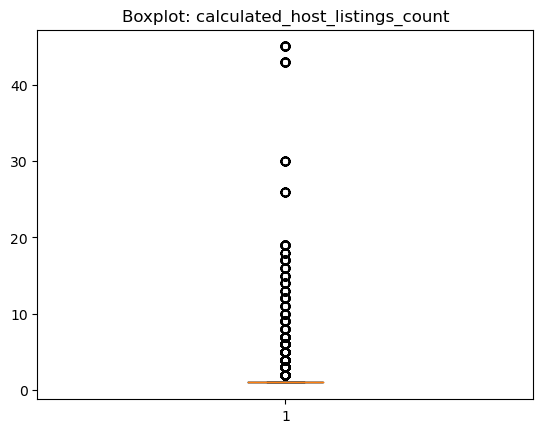

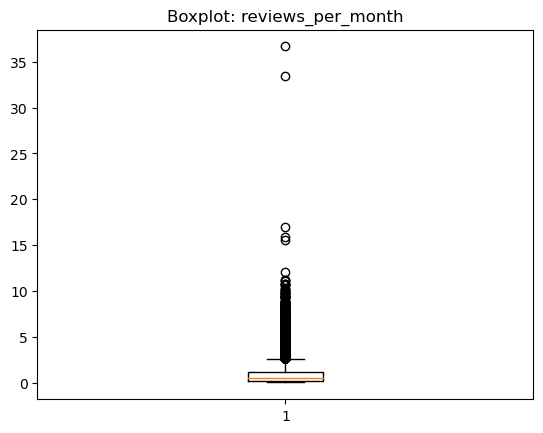

Columns with outliers: ['host_since', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'latitude', 'longitude', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']


In [27]:
# Empty list to store column names with outliers
columns_with_outliers = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Calculate the interquartile range (IQR)
    q1 = df[column].describe()['25%']
    q3 = df[column].describe()['75%']
    iqr = q3 - q1
    
    # Determine the outliers using the 1.5*IQR criterion
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Plot boxplot if outliers exist
    if not outliers.empty:
        plt.boxplot(df[column])
        plt.title('Boxplot: ' + column)
        plt.show()
        
        # Add column name to the list
        columns_with_outliers.append(column)

# Print the list of column names with outliers
print("Columns with outliers:", columns_with_outliers)

In [28]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL #Winsorization - UL - Capping, LL - Flooring

In [29]:
df_num = df[['host_since', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'latitude', 'longitude', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']]

In [30]:
for i in df_num.columns:
    LL, UL = replace_outlier(df_num[i])
    df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])#Winsorization - Capping and Flooring

C:\Users\HP\AppData\Local\Temp\ipykernel_9360\1943397354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_9360\1943397354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])#Winsorization - Capping and Flooring


<Axes: >

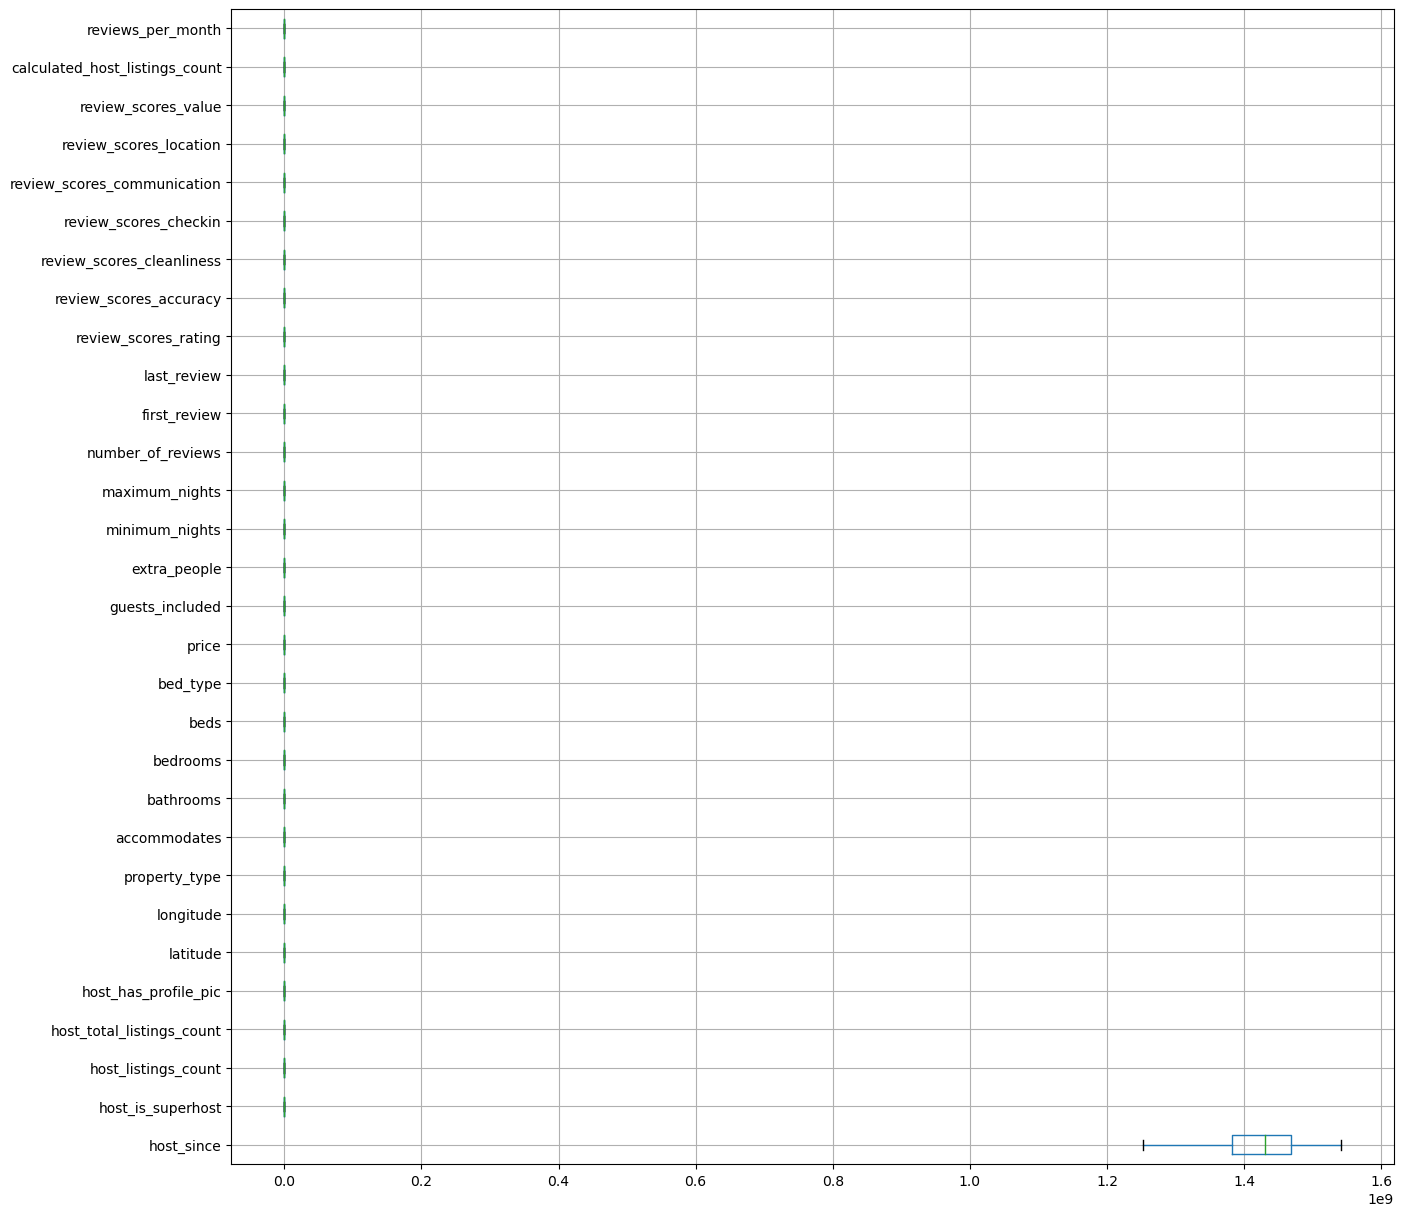

In [31]:
plt.figure(figsize=(15,15))
df_num.boxplot(vert=0)

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# To standardize and normalize the data in X_train and X_test, you can use the StandardScaler

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [34]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_sc=pd.DataFrame(X_train_scaled,columns=X.columns)

In [36]:
X_train_sc.head()

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,0.011355,-0.391791,-1.525499,-0.070968,-0.070968,0.018616,1.242255,-0.617409,-1.072658,-0.037766,0.673837,0.584924,-0.316977,0.884316,-0.422478,2.687116,-0.245984,-0.529059,0.169539,0.247909,-0.39557,-0.290855,-0.050175,-0.011832,-0.431433,1.162932,0.429422,0.735315,0.405865,0.564601,0.358472,0.347219,0.564226,0.599017,0.142171,-0.250017,-0.275571
1,-0.342761,-0.391791,-0.765343,-0.070968,-0.070968,0.018616,-0.796825,-0.390699,1.646631,-2.139694,-1.186274,0.584924,3.608537,-1.019496,-0.422478,-0.276827,-0.245984,-0.529059,0.169539,-0.552960,-0.39557,-0.741200,-0.096583,-0.011929,-0.186788,-1.570653,0.660418,0.446202,0.405865,0.564601,0.358472,0.347219,-0.830376,0.599017,1.350888,-0.250017,-0.586316
2,0.065058,2.500313,1.206953,-0.016506,-0.016506,0.018616,-0.796825,1.448173,-1.072658,-0.362107,0.558878,-1.709623,-0.316977,-1.019496,0.902154,-0.276827,-0.245984,0.317708,0.169539,-0.919053,0.79822,0.609833,-0.142990,-0.011931,2.585850,-0.274253,0.638859,-0.132025,0.405865,0.564601,0.358472,0.347219,0.564226,-0.668651,1.350888,0.019206,2.210389
3,-0.025135,-0.391791,1.206953,-0.070968,-0.070968,0.018616,-0.796825,-1.902100,-0.052924,0.416106,-0.116498,-1.709623,-0.316977,-1.019496,-0.422478,-0.276827,-0.245984,-0.529059,0.169539,-1.134006,-0.39557,-0.741200,-0.096583,-0.011832,-0.485798,0.226318,0.454062,0.301645,0.405865,0.564601,0.358472,0.347219,0.564226,0.599017,-1.066547,-0.250017,-0.355064
4,0.144694,-0.391791,0.179716,-0.070968,-0.070968,0.018616,-0.796825,0.516142,0.626898,0.956151,0.254621,0.584924,-0.316977,0.884316,-0.422478,-0.276827,-0.245984,-0.529059,0.169539,0.456145,-0.39557,-0.741200,-0.119787,-0.011936,-0.431433,1.051477,0.263105,0.735315,0.405865,0.564601,0.358472,0.347219,-0.830376,0.599017,-1.066547,-0.250017,-0.456236


In [37]:
X_test_sc=pd.DataFrame(X_test_scaled,columns=X.columns)

In [38]:
X_test_sc.head()

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,0.212166,-0.391791,1.165864,-0.016506,-0.016506,0.018616,-0.796825,0.062722,0.286987,-1.262259,0.472384,0.584924,-0.316977,-1.019496,0.902154,-0.276827,1.289587,2.011242,0.169539,1.269274,-0.395570,-0.741200,-0.096583,-0.011936,0.220953,0.337773,0.681978,-0.999365,-1.097360,-0.468983,-1.206298,-1.260628,0.564226,-0.668651,1.350888,-0.250017,0.345919
1,0.238100,-0.391791,-0.683164,-0.070968,-0.070968,0.018616,-0.796825,-1.171589,-0.732747,0.036463,1.417850,0.584924,4.857564,0.884316,-1.084795,-0.276827,-0.245984,-0.529059,0.169539,-0.082582,-0.395570,-0.741200,2.618269,-0.011926,-0.485798,0.226318,0.454062,0.301645,0.405865,0.564601,0.358472,0.347219,0.564226,0.599017,-1.066547,-0.250017,-0.355064
2,-0.274600,-0.391791,-0.888611,-0.070968,-0.070968,0.018616,1.242255,1.019942,-1.072658,-0.646510,0.157779,0.584924,1.824212,-1.019496,2.226786,-0.276827,2.825157,1.164475,0.169539,-0.245476,3.185801,0.609833,0.158660,-0.011928,-0.268336,-0.512806,-0.553082,0.012532,0.405865,-1.502567,0.358472,0.347219,0.564226,0.599017,1.350888,-0.250017,-0.564636
3,0.074238,-0.391791,-0.888611,0.146877,0.146877,0.018616,-0.796825,1.422983,-1.072658,-0.286342,0.380320,0.584924,-0.316977,0.884316,0.239838,-0.276827,-0.245984,-0.529059,0.169539,-1.260124,-0.395570,-0.741200,-0.096583,-0.011832,-0.241153,-0.864770,-0.667040,0.157089,-1.097360,-0.468983,0.358472,-1.260628,0.564226,0.599017,0.142171,0.826874,-0.571862
4,-0.133459,-0.391791,1.206953,-0.070968,-0.070968,0.018616,1.242255,-1.499060,-0.052924,0.807903,-0.118597,-1.709623,-0.316977,-1.019496,-0.422478,-0.276827,-0.245984,-0.529059,0.169539,0.966660,-0.395570,-0.741200,-0.119787,-0.011935,-0.213971,-0.385708,0.321624,-0.276582,0.405865,-0.468983,-1.206298,-1.260628,0.564226,-0.668651,-1.066547,-0.250017,-0.499596


In [39]:
# Create KNN for X_train and y_train and predict y_pred for test set

from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor object
knn_model = KNeighborsRegressor()

# Fit the model on the training data
knn_model.fit(X_train_sc, y_train)

# Predict the target variable for the test data
y_pred_knn = knn_model.predict(X_test_sc)

In [40]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square
from sklearn.metrics import mean_squared_error, r2_score
# Calculate RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Calculate R-square
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate adjusted R-square
n_knn = len(X_test)
p_knn = X_test.shape[1]
adj_r2_knn = 1 - (1 - r2_knn) * (n_knn - 1) / (n_knn - p_knn - 1)

print("KNN Model:")
print(f"RMSE: {rmse_knn}")
print(f"R-square: {r2_knn}")
print(f"Adjusted R-square: {adj_r2_knn}")

KNN Model:
RMSE: 58.09742152574923
R-square: 0.8996599778979314
Adjusted R-square: 0.8988299799507424


In [41]:
# Evaluate the KNN model by RMSE, R square, and adjusted R square fro train set

rmse_knn_train = np.sqrt(mean_squared_error(y_train, knn_model.predict(X_train_sc)))
r2_knn_train = r2_score(y_train, knn_model.predict(X_train_sc))
n_knn_train = len(X_train)
p_knn_train = X_train.shape[1]
adj_r2_knn_train = 1 - (1 - r2_knn_train) * (n_knn_train - 1) / (n_knn_train - p_knn_train - 1)

print("KNN Model (Train Set):")
print(f"RMSE: {rmse_knn_train}")
print(f"R-square: {r2_knn_train}")
print(f"Adjusted R-square: {adj_r2_knn_train}")

KNN Model (Train Set):
RMSE: 118.27195343928891
R-square: 0.7321886499447781
Adjusted R-square: 0.7316382405712268


# END